get a list of words used for each part of type to be used in [word cloud](https://www.wordclouds.com/) for presentation

like word cloud 'E' of all words used by Extroverts versus word cloud 'I'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
mbti = pd.read_csv('data/train.csv')

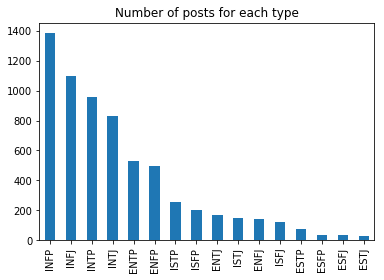

In [5]:
mbti['type'].value_counts().plot(kind = 'bar', title='Number of posts for each type')


In [6]:
all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

In [7]:
print(f"before:  {mbti.shape} \nafter: {all_mbti.shape}")

before:  (6506, 2) 
after: (316548, 2)


In [8]:
mbti_type = pd.concat([mbti['type'].value_counts().to_frame(name='before'), all_mbti['type'].value_counts().to_frame(name='after')],axis=1)
mbti_type


,before,after
ENFJ,143,6947
ENFP,496,23925
ENTJ,167,8174
ENTP,530,26017
ESFJ,35,1668
ESFP,36,1663
ESTJ,30,1495
ESTP,71,3437
INFJ,1100,53807
INFP,1386,67846


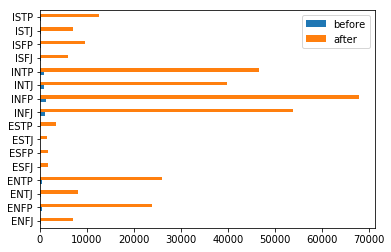

In [9]:
mbti_type.plot(kind='barh')

It's easier to do binary classification than 16 class (multi-class) classification.

In [10]:
def split_type(row):
    ''' 
       Split MBTI type into individual features for Binary Classification
       eg ENFP = [0 1 0 0]
    '''
    t = row['type']
    I,N,T,J = 0,0,0,0
    
    I = 1 if t[0] =='I' else 0
    
    N = 1 if t[1] == 'N' else 0
    
    T = 1 if t[2] == 'T' else 0
    
    J = 1 if t[3] == 'J' else 0
    
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

In [11]:
all_mbti = all_mbti.join(all_mbti.apply(lambda row: split_type(row), axis=1))
all_mbti.head(5)

,type,post,IE,JP,NS,TF
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,1,1,1,0
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,1,1,1,0
2,INFJ,enfp and intj moments https://www.youtube.com...,1,1,1,0
3,INFJ,What has been the most life-changing experienc...,1,1,1,0
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,1,1,1,0


In [12]:
# rearrange columns
all_mbti = all_mbti[['type', 'IE', 'NS', 'TF', 'JP', 'post']]
all_mbti.head(5)

,type,IE,NS,TF,JP,post
0,INFJ,1,1,0,1,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,1,1,0,1,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,1,1,0,1,enfp and intj moments https://www.youtube.com...
3,INFJ,1,1,0,1,What has been the most life-changing experienc...
4,INFJ,1,1,0,1,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...


In [13]:
print ("Introversion (I) -     Extroversion (E):\t")
print("\t", all_mbti['IE'].value_counts()[0], "  -     ", all_mbti['IE'].value_counts()[1])
print ("Intuition (N)    -     Sensing (S):\t\t")
print("\t", all_mbti['NS'].value_counts()[0], "  -     ", all_mbti['NS'].value_counts()[1])
print ("Thinking (T)     -     Feeling (F):\t\t")
print("\t", all_mbti['TF'].value_counts()[0], " -      ", all_mbti['TF'].value_counts()[1])
print ("Judging (J)      -     Perceiving (P):\t\t")
print("\t", all_mbti['JP'].value_counts()[0], " -      ", all_mbti['JP'].value_counts()[1])

Introversion (I) -     Extroversion (E):	
	 73326   -      243222
Intuition (N)    -     Sensing (S):		
	 43419   -      273129
Thinking (T)     -     Feeling (F):		
	 171428  -       145120
Judging (J)      -     Perceiving (P):		
	 191612  -       124936


### Stop Words

In [114]:
my_stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren',
"aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',
'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't",
'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't",
'have', 'haven', "haven't", 'having',  'how', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its',
'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'needn',
"needn't", 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't",
'she', "she's", 'should', "should've",'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'then',
'there', 'these', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we',
'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't",
'wouldn', "wouldn't", 'y','ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP', 'ESTP', 'ESFP', 'ENFP', 'ENTP', 'ESTJ',
'ESFJ', 'ENFJ', 'ENTJ']
print("Number of stop words: {}".format(len(my_stopwords)))

Number of stop words: 164


In [105]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))

Number of stop words: 318


In [132]:
my_stopwords2 = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along',
                 'already', 'also', 'although', 'always', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 
                 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 
                 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
                 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 
                 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 
                 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 
                 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 
                 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 
                 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'hence', 'here', 
                 'hereafter', 'hereby', 'herein', 'hereupon', 'how', 'however', 
                 'hundred', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 
                 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'meanwhile', 'might', 
                 'mill', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'name', 'namely', 
                 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'nothing', 
                 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 
                 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 'same',
                 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'should', 'show', 'side', 'since', 
                 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 
                 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'then', 'thence', 
                 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 
                 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 
                 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'well', 
                 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 
                 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 
                 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves']



In [133]:
print("Number of my_stopwords2: {}".format(len(my_stopwords2)))

Number of my_stopwords2: 296


words removed from ENGLISH_STOP_WORDS

In [134]:
not_ENGLISH_STOP_WORDS = ['am', 'he', 'her', 'i', 'hers', 'herself', 'him', 'himself', 'his', 'me', 'mine', 'my', 'myself', 
                          'not', 'our', 'ours', 'ourselves', 'she', 'their', 'them', 'themselves', 'we',]
print(f'{len(not_ENGLISH_STOP_WORDS)} words removed from ENGLISH_STOP_WORDS')

22 words removed from ENGLISH_STOP_WORDS


### Training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
all_mbti.head()

,type,IE,NS,TF,JP,post
0,INFJ,1,1,0,1,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,1,1,0,1,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,1,1,0,1,enfp and intj moments https://www.youtube.com...
3,INFJ,1,1,0,1,What has been the most life-changing experienc...
4,INFJ,1,1,0,1,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...


In [34]:
X_train, X_test, y_train, y_test = train_test_split(all_mbti['post'], all_mbti['JP'], test_size=0.3, 
                                                    random_state=6)

---
## one is good, more is better. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [21]:
forest_pipe = Pipeline([('count_vec', TfidfVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words='english')),
                      ('forest', RandomForestClassifier(n_estimators=10, random_state=2, class_weight="balanced", criterion='gini'))
                    ])

In [22]:
%%time
forest_pipe.fit(X_test, y_test)

CPU times: user 1min 15s, sys: 500 ms, total: 1min 15s
Wall time: 1min 15s


Pipeline(memory=None,
     steps=[('count_vec', TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True...estimators=10, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False))])

In [23]:
print("Accuracy on training set: {:.3f}".format(forest_pipe.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_pipe.score(X_test, y_test)))

Accuracy on training set: 0.736
Accuracy on test set: 0.970


In [24]:
y_pred = forest_pipe.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[20826,  1558],
       [ 1253, 71328]])

In [25]:
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.94      0.93      0.94     22384
          1       0.98      0.98      0.98     72581

avg / total       0.97      0.97      0.97     94965



In [26]:
print(classification_report(y_pred, y_test)) # 23 mins

             precision    recall  f1-score   support

          0       0.94      0.93      0.94     22384
          1       0.98      0.98      0.98     72581

avg / total       0.97      0.97      0.97     94965



In [174]:
forest_pipe = Pipeline([('count_vec', CountVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words='english')),
                      ('forest', RandomForestClassifier(n_estimators=10, random_state=2))
                    ])
print(classification_report(y_pred, y_test)) #1.5 mins

             precision    recall  f1-score   support

          0       0.99      0.94      0.97     60476
          1       0.91      0.99      0.95     34489

avg / total       0.96      0.96      0.96     94965



In [157]:
# baseline no stopwords
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.98      0.92      0.95     61250
          1       0.87      0.97      0.92     33715

avg / total       0.94      0.94      0.94     94965



In [ ]:
# .94 binary=True, min_df=3, ngram_range=(1,2), stop_words='english')

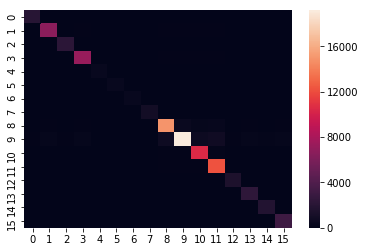

In [74]:
sns.heatmap(confusion_matrix(y_pred, y_test))

In [226]:
forest_pipe.predict_proba(X_test)

array([[ 0.9       ,  0.1       ],
       [ 0.35234874,  0.64765126],
       [ 0.14      ,  0.86      ],
       ..., 
       [ 0.18      ,  0.82      ],
       [ 0.82      ,  0.18      ],
       [ 0.776     ,  0.224     ]])

In [221]:
print(y_pred)

[0 1 1 ..., 1 0 0]


In [ ]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

___
another ensemle model; Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gbrt_pipe = Pipeline([('count_vec', CountVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words=my_stopwords)),
                        ('gbrt', GradientBoostingClassifier(random_state=0))
                      ])

In [47]:
%%time
gbrt_pipe.fit(X_train, y_train)

CPU times: user 3min 10s, sys: 2.25 s, total: 3min 12s
Wall time: 3min 16s


Pipeline(memory=None,
     steps=[('count_vec', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['a', '...         presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False))])

In [49]:
print("Accuracy on training set: {:.3f}".format(gbrt_pipe.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_pipe.score(X_test, y_test)))

Accuracy on training set: 0.776
Accuracy on test set: 0.772


---
Adaboost

In [27]:
from sklearn.ensemble import AdaBoostClassifier


In [35]:
abc_pipe = Pipeline([('count_vec', TfidfVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words='english')),
                        ('abc', AdaBoostClassifier())
                      ])

In [36]:
%%time
abc_pipe.fit(X_train, y_train)

CPU times: user 1min 4s, sys: 2.56 s, total: 1min 7s
Wall time: 1min 7s


Pipeline(memory=None,
     steps=[('count_vec', TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [37]:
print("Accuracy on training set: {:.3f}".format(forest_pipe.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_pipe.score(X_test, y_test)))

Accuracy on training set: 0.425
Accuracy on test set: 0.506


In [38]:
y_pred = forest_pipe.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[16516,  5868],
       [41043, 31538]])

In [40]:
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.29      0.74      0.41     22384
          1       0.84      0.43      0.57     72581

avg / total       0.71      0.51      0.54     94965



In [ ]:
# Adaboost classifier using SAMME.R
bdt_real = AdaBoostClassifier(
    #    SVC(C=44, kernel='linear', probability=True),
     RandomForestClassifier(),
   # DecisionTreeClassifier(max_depth=2),
   # n_estimators=num_estimators,
    learning_rate=1)

# Adaboost classifier using SAMME
bdt_discrete = AdaBoostClassifier(
   # DecisionTreeClassifier(max_depth=2),
    RandomForestClassifier(),
   #SVC(C=44, kernel='linear', probability=True),
  #  n_estimators=num_estimators,
    learning_rate=1,
    algorithm="SAMME")


# Find best value of n_estimator using grid search
param_grid = {"n_estimators" : [1, 10, 50, 100]}  #, 200, 300, 400, 500, 600]}
grid_search = GridSearchCV(bdt_real, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
print 'Best parameters of Adaboost SAMME.R:' , grid_search.best_params_
print 'Best scrore of Adaboost SAMME.R:', grid_search.best_score_
pdb.set_trace()
grid_search = GridSearchCV(bdt_discrete, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
print 'Best parameters of Adaboost SAMME:' , grid_search.best_params_
print 'Best scrore of Adaboost SAMME:', grid_search.best_score_

---
GridSearch to find best parameters of LinearSVM, LogisticRegression, DecisionTree and RandomForest

include tfidfvectorizer (True, False)

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print CV_rfc.best_params_

In [ ]:
parameters= {
    count_vec__binary : (False, True),
    count_vec__min_df : [1,2,3],
    count_vec__ngram_range : [(1,1),(1,2),(1,3)],
    count_vec__stop_words : (None, 'english', my_stopwords),
    
}